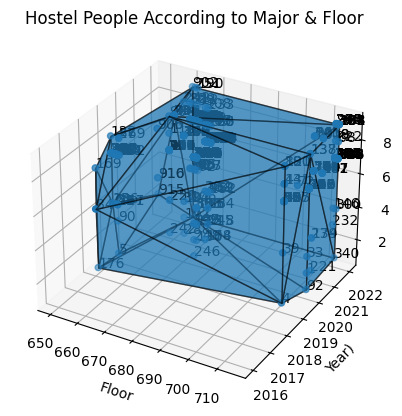

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import ConvexHull

# Load the CSV data
data = """
650,2019,7,0227
650,2019,8,0122
650,2019,7,0219
650,2019,7,0072
650,2019,4,0018
650,2019,4,0156
650,2019,7,0266
650,2019,7,0101
650,2019,7,0027
650,2019,7,0257
650,2019,7,0042
650,2019,7,0081
651,2019,7,0010
651,2019,4,0061
651,2019,7,0038
651,2018,7,0169
651,2019,7,0048
651,2019,7,0016
651,2019,7,0095
651,2019,7,0052
651,2019,7,0053
651,2018,1,0176
651,2019,7,0032
651,2019,7,0047
651,2019,7,0040
651,2019,7,0086
651,2019,7,0006
651,2019,7,0113
651,2019,7,0099
652,2019,4,0261
652,2019,7,0244
652,2019,7,0028
652,2019,7,0111
652,2019,7,0075
652,2019,4,0247
652,2019,3,0090
652,2019,4,0041
652,2019,7,0094
652,2019,7,0008
652,2019,7,0096
652,2019,4,0054
652,2019,1,0005
652,2019,7,0264
652,2019,7,0070
652,2019,4,0079
653,2019,7,0097
653,2019,8,0269
653,2019,7,0902
653,2019,8,0057
654,2022,7,0337
654,2022,7,0900
654,2022,7,0803
654,2022,7,0901
654,2022,7,0904
654,2022,7,0905
654,2022,7,0257
654,2022,7,0341
654,2022,7,0237
654,2022,7,0339
654,2021,7,0906
654,2021,4,0916
654,2021,3,0915
654,2021,7,0905
654,2021,4,0910
660,2022,8,0085
660,2022,8,0329
660,2022,7,0229
660,2022,7,0180
660,2022,7,0279
660,2022,7,0319
660,2022,7,0026
660,2022,4,0092
660,2022,7,0043
660,2022,7,0308
660,2022,7,0041
660,2022,2,0106
660,2022,4,0295
660,2022,4,0336
660,2022,7,0305
660,2022,7,0170
660,2022,7,0335
660,2022,4,0303
660,2022,7,0172
660,2022,7,0274
660,2022,7,0164
660,2022,7,0276
661,2022,7,0249
661,2022,7,0053
661,2022,7,0065
661,2022,7,0118
661,2022,7,0047
661,2022,7,0286
661,2022,7,0231
661,2022,7,0096
661,2022,4,0058
661,2022,7,0258
661,2022,8,0312
661,2022,4,0060
661,2022,7,0066
661,2022,7,0115
661,2022,7,0213
661,2022,7,0042
661,2022,7,0230
661,2022,7,0054
661,2022,9,0902
661,2022,7,0315
661,2022,7,0069
661,2022,7,0238
661,2022,7,0236
661,2022,7,0159
661,2022,7,0113
661,2022,7,0195
661,2022,1,0067
661,2022,7,0044
661,2022,7,0156
662,2022,7,0103
662,2022,7,0177
662,2022,7,0046
662,2022,7,0070
662,2022,7,0102
662,2022,7,0187
662,2022,7,0191
662,2022,7,0241
662,2022,9,0251
662,2022,4,0005
662,2022,7,0302
662,2022,4,0217
662,2022,7,0250
662,2022,7,0278
662,2022,7,0282
662,2022,7,0072
662,2022,7,0153
662,2022,7,0117
662,2022,7,0239
662,2022,7,0056
662,2022,7,0109
662,2022,7,0107
662,2022,7,0073
662,2022,7,0036
662,2022,4,0223
662,2022,7,0111
662,2022,7,0082
662,2022,7,0037
662,2022,7,0114
663,2022,7,0045
663,2022,7,0104
663,2022,7,0293
663,2022,4,0062
663,2022,7,0064
663,2022,7,0184
663,2022,7,0221
663,2022,8,0039
663,2022,7,0155
663,2022,7,0105
663,2022,7,0186
663,2022,7,0057
663,2022,7,0270
663,2022,7,0112
663,2022,7,0246
663,2022,7,0157
663,2022,7,0226
663,2022,7,0194
663,2022,7,0154
663,2022,7,0052
663,2022,7,0168
663,2022,9,0190
663,2022,7,0051
663,2022,7,0171
664,2022,7,0802
664,2021,7,0109
664,2021,7,0105
664,2021,7,0290
664,2021,7,0299
664,2021,7,0328
664,2021,7,0275
664,2021,7,0334
664,2021,7,0034
664,2021,3,0197
664,2021,3,0324
664,2021,7,0272
664,2021,7,0070
664,2021,9,0242
664,2021,1,0288
664,2021,7,0243
664,2021,7,0043
664,2021,2,0172
664,2021,7,0190
664,2021,7,0029
665,2020,7,0258
665,2016,7,0084
665,2020,7,0260
665,2020,7,0263
665,2020,2,0242
665,2020,7,0254
665,2020,4,0251
665,2020,7,0172
665,2020,7,0257
665,2020,7,0249
665,2020,4,0220
665,2020,7,0269
665,2020,7,0211
665,2020,7,0259
665,2020,7,0271
665,2020,7,0247
665,2020,7,0041
665,2020,7,0181
665,2020,7,0131
665,2020,7,0264
665,2020,7,0907
665,2020,7,0903
665,2020,7,0261
665,2020,7,0206
665,2020,7,0035
665,2020,7,0900
665,2020,8,0114
665,2020,9,0904
672,2021,1,0104
672,2021,7,0164
672,2021,7,0019
672,2021,4,0284
672,2021,7,0182
672,2021,7,0124
672,2021,7,0226
672,2021,7,0112
672,2021,7,0193
672,2021,7,0238
672,2021,7,0283
672,2021,7,0268
672,2021,9,0108
672,2021,7,0246
672,2021,7,0166
672,2021,7,0303
672,2021,7,0235
672,2021,7,0138
672,2021,1,0178
672,2021,7,0062
672,2021,7,0125
672,2021,7,0118
672,2021,7,0081
672,2021,8,0167
672,2021,7,0255
672,2021,7,0161
672,2021,8,0148
672,2021,7,0236
672,2021,7,0134
672,2021,7,0181
672,2021,7,0009
672,2021,4,0122
672,2021,7,0192
673,2021,4,0046
673,2021,7,0218
673,2021,7,0020
673,2021,7,0253
673,2021,8,0266
673,2021,4,0212
673,2021,7,0210
673,2021,7,0214
673,2021,7,0250
673,2021,8,0230
673,2021,3,0264
673,2021,3,0055
673,2021,7,0068
673,2021,7,0232
673,2021,7,0201
673,2021,7,0217
673,2021,7,0090
673,2021,7,0024
673,2021,8,0223
673,2021,7,0037
673,2021,7,0002
673,2021,7,0285
673,2021,7,0216
673,2021,7,0126
673,2021,7,0110
673,2021,2,0115
673,2021,7,0010
673,2021,2,0248
673,2021,7,0135
673,2021,9,0233
673,2021,7,0333
673,2021,4,0159
673,2021,3,0088
674,2020,7,0240
674,2020,7,0200
674,2020,1,0246
674,2020,2,0248
674,2021,7,0052
674,2021,7,0224
674,2021,7,0220
674,2021,7,0160
674,2021,7,0067
674,2021,7,0247
674,2021,4,0252
674,2020,3,0197
674,2021,7,0254
674,2021,8,0089
674,2021,7,0154
674,2020,7,0255
674,2020,7,0230
674,2020,7,0081
674,2020,7,0082
674,2020,7,0226
674,2020,3,0149
674,2020,7,0084
674,2020,7,0077
674,2020,7,0203
674,2020,7,0121
674,2020,7,0134
674,2020,7,0083
674,2020,7,0238
674,2020,7,0105
674,2020,7,0237
674,2020,7,0139
674,2020,7,0256
675,2020,7,0117
675,2020,2,0136
675,2020,7,0144
675,2020,7,0170
675,2020,4,0185
675,2020,7,0028
675,2020,7,0109
675,2020,7,0110
675,2020,7,0087
675,2020,7,0167
675,2020,7,0124
675,2020,7,0113
675,2020,7,0101
675,2020,7,0085
675,2020,3,0115
675,2020,3,0223
675,2020,7,0075
675,2020,7,0079
675,2020,7,0116
675,2020,7,0122
675,2020,7,0130
675,2020,7,0099
675,2020,4,0088
675,2020,7,0132
675,2020,7,0133
675,2020,7,0141
675,2020,7,0080
675,2020,4,0171
675,2020,7,0143
675,2020,7,0064
675,2020,7,0030
675,2020,4,0056
675,2020,7,0120
711,2021,7,0239
711,2021,3,0179
711,2021,9,0145
711,2021,7,0174
711,2021,7,0051
711,2021,9,0060
711,2021,7,0143
711,2021,7,0273
711,2021,7,0129
711,2021,9,0265
711,2021,7,0286
711,2021,7,0292
711,2021,1,0221
711,2021,7,0075
711,2021,7,0123
711,2021,7,0249
711,2021,9,0094
711,2021,3,0234
711,2021,7,0200
711,2021,7,0204
711,2021,7,0100
711,2021,7,0271
711,2020,7,0072
712,2019,9,0082
712,2019,7,0050
712,2019,1,0004
712,2019,9,0190
712,2019,8,0141
712,2019,7,0225
712,2019,9,0019
712,2019,7,0083
712,2019,7,0066
712,2019,7,0059
712,2019,7,0060
712,2019,8,0043
712,2019,7,0015
712,2019,4,0039
712,2019,7,0117
712,2019,7,0073
712,2019,9,0181
712,2019,7,0045
712,2019,7,0049
713,2022,7,0004
713,2022,7,0185
713,2022,7,0162
713,2022,7,0097
713,2022,9,0268
713,2022,3,0232
713,2022,7,0132
713,2022,9,0244
713,2022,7,0116
713,2022,7,0101
713,2022,7,0243
713,2022,7,0174
713,2022,4,0146
713,2022,7,0247
713,2022,8,0222
713,2022,9,0099
713,2022,7,0049
713,2022,7,0225
713,2022,7,0074
713,2022,7,0261
713,2022,7,0166
713,2022,7,0121
713,2022,7,0267
713,2022,7,0183
713,2022,9,0275
714,2022,9,0133
714,2022,7,0330
714,2022,8,0068
714,2022,7,0216
714,2022,7,0301
714,2022,4,0300
714,2022,1,0340
714,2022,7,0338
714,2022,9,0181
714,2022,7,0188
714,2022,7,0306
714,2022,9,0304
714,2022,9,0158
714,2022,7,0038
714,2022,9,0265
714,2021,7,0907
714,2021,7,0018
714,2022,7,0023
714,2021,9,0908
714,2021,7,0902
714,2022,7,0903
714,2021,9,0919
714,2021,7,0801
715,2020,1,0092
715,2020,7,0025
715,2020,3,0033
715,2020,7,0125
715,2020,7,0140
715,2020,7,0031
715,2020,7,0100
715,2020,7,0045
715,2020,7,0266
715,2020,2,0001
715,2020,7,0118
715,2020,7,0169
715,2020,7,0243
715,2020,7,0078
715,2020,9,0138
715,2020,7,0252
715,2020,7,0208
715,2020,7,0216
715,2020,7,0123
715,2020,7,0241
715,2020,7,0262
715,2020,9,0137
715,2020,7,0076

"""

# Create a DataFrame
from io import StringIO

df = pd.read_csv(StringIO(data), header=None)

# Extract the x, y, and z coordinates (second, third, and fourth columns)
points = df[[0, 1, 2]].astype(float).values

# Compute the convex hull
hull = ConvexHull(points)

# Plot the points and convex hull in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(points[:, 0], points[:, 1], points[:, 2])

# Plot the convex hull
for simplex in hull.simplices:
    poly = Poly3DCollection([points[simplex]], alpha=0.5, edgecolor='k')
    ax.add_collection3d(poly)

# Use the last field as label
labels = df[3].values
for i, txt in enumerate(labels):
    ax.text(points[i, 0], points[i, 1], points[i, 2], txt)

ax.set_xlabel('Floor')
ax.set_ylabel('Year)')
ax.set_zlabel('Course')
ax.set_title('Hostel People According to Major & Floor')

plt.show()
